## CREDIT CARD FRAUD DETECTION MODEL
The aim of this model is to build up a model that can detect fradulent credit card activities using the data provided.
<br> First, the necessary libaries are imported after which the dataset would explored.
<br> After data exploration, a simple regression model would be built for prediction of fradulent card transactions.

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit_card = pd.read_csv('C:\\Users\\USER\\Documents\\python\\projects\\Fraud project\\creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset contains transactions made by credit cards within two days in September, 2013 by European cardholders.
<br> It contains only numerical input variables which are as a result of PCA transformation. For confidentiality, the original features and more background information about the data cannot be provided.
<br> Features **V1, V2,...,V28** are the principal componenets obtained with PCA (Principal Component Analysis)
<br> **Time** contains the number of seconds elapsed between each transaction and the first transaction in the dataset.
<br> **Amount** is the transaction amount.
<br> **Class** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print(credit_card.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [5]:
print("null values for dataset?", credit_card.isnull().values.any())

null values for dataset? False


In [6]:
fraud = credit_card[credit_card.Class == 1]
print(fraud.shape)
fraud.head()

(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [7]:
non_fraud = credit_card[credit_card.Class == 0]
print(non_fraud.shape)
non_fraud.head()

(284315, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


From the codes above,
- the dataset contains details of 284,807 credit card usage.
- of the credit card usage, 492 are fradulent.
- of the usuage, 284,315 are not fradulent.

In [8]:
import matplotlib.pyplot as plt

## Regression Model

In [9]:
# code to seperate Time and Class from the data
credit_model = credit_card.iloc[:, 1:-1]
credit_model.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


The credit_model would be used to train and test the model to predict the credit_card["Class"].
<br> Next, we would need to scale all features of credit_model to a general scale.

In [10]:
from sklearn import preprocessing
credit_model_column = credit_model.columns.values

In [11]:
credit_model_np = preprocessing.minmax_scale(credit_model)
credit_model_np

array([[9.35192337e-01, 7.66490419e-01, 8.81364903e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [9.78541955e-01, 7.70066651e-01, 8.40298490e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [9.35217023e-01, 7.53117667e-01, 8.68140819e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.90904812e-01, 7.64079694e-01, 7.81101998e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.54208999e-01, 7.72855742e-01, 8.49587129e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [9.49231759e-01, 7.65256401e-01, 8.49601462e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [12]:
credit_model_final = pd.DataFrame(credit_model_np, columns= credit_model_column)

In [13]:
credit_model_final.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


All features are now between 0 to 1 scale.
<br> Next, we split the data into Train and Test of 80% and 20% respectively

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# the code below is to split the data into training and testing. where Y is the predicted feature i.e Class
X_train, X_test, Y_train, Y_test = train_test_split(credit_model_final, credit_card['Class'], test_size = 0.2, random_state = 42)

In [16]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,0.991508,0.763241,0.831955,0.266566,0.762287,0.262153,0.261530,0.785772,0.499108,0.508092,...,0.578930,0.565319,0.555202,0.666224,0.344693,0.575381,0.390038,0.417345,0.312167,0.000389
165061,0.951482,0.760643,0.864365,0.162484,0.764991,0.264712,0.265465,0.781077,0.464171,0.521366,...,0.575257,0.559005,0.529703,0.667118,0.246933,0.511856,0.484568,0.409673,0.310186,0.001787
238186,0.959526,0.775917,0.827686,0.220461,0.772990,0.259406,0.270155,0.786643,0.458258,0.495517,...,0.580396,0.556407,0.469307,0.666672,0.402201,0.553688,0.444999,0.420321,0.314550,0.000467
150562,0.949204,0.777964,0.867750,0.374695,0.769083,0.273097,0.270521,0.784513,0.475580,0.520320,...,0.577563,0.562504,0.530717,0.664353,0.442628,0.541128,0.395876,0.414794,0.311806,0.004571
138452,0.889881,0.787278,0.829966,0.250619,0.759955,0.258190,0.262702,0.799478,0.481246,0.533999,...,0.580134,0.553731,0.499284,0.669157,0.391181,0.604333,0.465523,0.421807,0.306576,0.001003


In [17]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,0.677529,0.857843,0.514238,0.673305,0.672857,0.234543,0.163607,0.866023,0.169727,0.216788,...,0.564135,0.580675,0.457425,0.630407,0.472983,0.498552,0.349857,0.379253,0.291962,0.014176
49906,0.964067,0.738308,0.835090,0.190502,0.755945,0.273234,0.262161,0.787789,0.493775,0.497032,...,0.585653,0.558039,0.466062,0.657610,0.226330,0.595376,0.303485,0.417268,0.315195,0.020245
29474,0.982071,0.761026,0.840336,0.206273,0.762082,0.263426,0.261014,0.785410,0.429305,0.524380,...,0.582532,0.563130,0.517881,0.662959,0.273053,0.606258,0.387496,0.416722,0.313218,0.001207
276481,0.950953,0.784646,0.808486,0.236437,0.771006,0.256679,0.267043,0.791672,0.446082,0.480240,...,0.577661,0.567266,0.550787,0.662781,0.379920,0.566265,0.399679,0.412129,0.313163,0.000058
278846,0.992512,0.765809,0.819811,0.266438,0.764490,0.253402,0.265619,0.783661,0.475293,0.514090,...,0.577547,0.557632,0.481276,0.670588,0.390529,0.557688,0.453990,0.415070,0.311692,0.000035


In [18]:
Y_train.head()

223361    0
165061    0
238186    0
150562    0
138452    0
Name: Class, dtype: int64

In [19]:
Y_test.head()

43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64

In [20]:
X_train.shape, X_test.shape

((227845, 29), (56962, 29))

In [21]:
X_train['Amount'].describe()

count    227845.000000
mean          0.003444
std           0.009923
min           0.000000
25%           0.000218
50%           0.000856
75%           0.003001
max           1.000000
Name: Amount, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
#the regression model is initialized
reg= LinearRegression()

In [26]:
#code to train the model
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# code to predict the Class
credit_predict = reg.predict(X_test)

In [28]:
#the code below is used to get the regression coefficients of the linear model
print('Regression coefficients: \n', reg.coef_)

Regression coefficients: 
 [-0.11263317  0.27571496 -0.29106496  0.08614363 -0.34362114 -0.16549408
 -1.13676806  0.07677627 -0.10559026 -0.39276885  0.10635429 -0.28892201
 -0.00195519 -0.39483821 -0.00266147 -0.29268882 -0.54916654 -0.08125744
  0.02406558  0.02383244  0.1187878   0.00509879  0.00539427 -0.00399855
  0.00672869  0.00265226  0.0906304   0.05754103  0.18872372]


The coeffients are in the same order that the variables were fed to the model. The code below shows the order

In [29]:
credit_model.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

In [30]:
reg_coefficients = pd.DataFrame(reg.coef_, credit_model.columns, columns =['Regression Coefficients'])

In [31]:
reg_coefficients

,Regression Coefficients
V1,-0.112633
V2,0.275715
V3,-0.291065
V4,0.086144
V5,-0.343621
V6,-0.165494
V7,-1.136768
V8,0.076776
V9,-0.105590
V10,-0.392769


### NOTE:
<Br>The importance of a predictor can be measured by the magnitude of its regression coefficient.

In [58]:
reg_coefficients.abs().nlargest(n=5, columns='Regression Coefficients')

,Regression Coefficients
V7,1.136768
V17,0.549167
V14,0.394838
V10,0.392769
V5,0.343621


From the data above, the five features most correlated with fraud are in decreasing order, V7, V17, V14, V10 and V5.

In [69]:
#the code below is to print out the regression intercept of the model
print('Intercept:', reg.intercept_)

Intercept: 1.772742990836111


Next, the actual output and the predicted output are compared to see the difference. The comparism is done on a table and then shown visually.

In [35]:
# code to compare thee actual output values with the predicted
from sklearn import metrics
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': credit_predict})
compare

,Actual,Predicted
43428,1,1.218014
49906,0,-0.000860
29474,0,-0.001007
276481,0,0.003071
278846,0,-0.001233
...,...,...
75723,0,-0.004546
252263,0,-0.000509
221246,0,0.001009
81910,0,0.001018


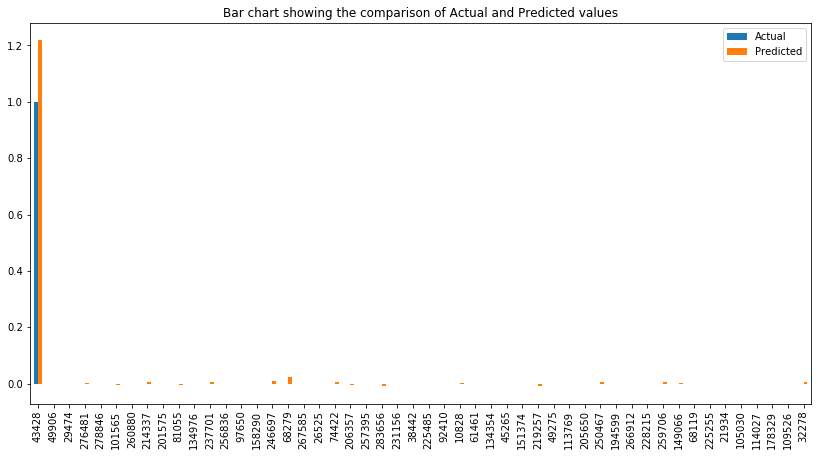

In [36]:
compare1 = compare.head(50)
compare1.plot(kind='bar', figsize=(14,7))
plt.title('Bar chart showing the comparison of Actual and Predicted values')

plt.show()

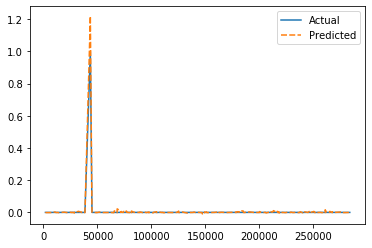

In [71]:
import seaborn as sns
sns.lineplot(data = compare.head(200))

To calculate the model error, the following is done

In [33]:
from sklearn.metrics import mean_squared_error

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, credit_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, credit_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, credit_predict)))


Mean Absolute Error: 0.0034299524725056488
Mean Squared Error: 0.00083003585229659
Root Mean Squared Error: 0.028810342800747617


## Conclusion
We were able to build up a simple regression model that identifies frudulent credit card transactions. We found that the five features most correlated with fraud are in decreasing order, V7, V17, V14, V10 and V5.